<h1>Project Title: Analyzing Global COVID-19 Trends with Pandas and Numpy</h1>

<p><strong>Import all the neceesary libraries</strong></p>

In [1]:
import numpy as np
import pandas as pd

In [2]:
#Now we load the CSV files using the pandas
dataset = pd.read_csv(r"/kaggle/input/final-covid-dataset/owid-covid-data.csv")

In [3]:
#showing the first few rows
dataset.head(2)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [4]:
#Now check the total number of rows and columns
dataset.shape

(429435, 67)

In [5]:
#Now select the useful coulmns
features = dataset[["location","date","total_cases","new_cases","total_deaths","new_deaths","population"]]

In [6]:
features

,location,date,total_cases,new_cases,total_deaths,new_deaths,population
0,Afghanistan,2020-01-05,0.0,0.0,0.0,0.0,41128772
1,Afghanistan,2020-01-06,0.0,0.0,0.0,0.0,41128772
2,Afghanistan,2020-01-07,0.0,0.0,0.0,0.0,41128772
3,Afghanistan,2020-01-08,0.0,0.0,0.0,0.0,41128772
4,Afghanistan,2020-01-09,0.0,0.0,0.0,0.0,41128772
...,...,...,...,...,...,...,...
429430,Zimbabwe,2024-07-31,266386.0,0.0,5740.0,0.0,16320539
429431,Zimbabwe,2024-08-01,266386.0,0.0,5740.0,0.0,16320539
429432,Zimbabwe,2024-08-02,266386.0,0.0,5740.0,0.0,16320539
429433,Zimbabwe,2024-08-03,266386.0,0.0,5740.0,0.0,16320539


In [7]:
#Now convert date data column in the date time format
features["date"] = pd.to_datetime(features["date"])

/tmp/ipykernel_70/2007402118.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features["date"] = pd.to_datetime(features["date"])


In [8]:
features

,location,date,total_cases,new_cases,total_deaths,new_deaths,population
0,Afghanistan,2020-01-05,0.0,0.0,0.0,0.0,41128772
1,Afghanistan,2020-01-06,0.0,0.0,0.0,0.0,41128772
2,Afghanistan,2020-01-07,0.0,0.0,0.0,0.0,41128772
3,Afghanistan,2020-01-08,0.0,0.0,0.0,0.0,41128772
4,Afghanistan,2020-01-09,0.0,0.0,0.0,0.0,41128772
...,...,...,...,...,...,...,...
429430,Zimbabwe,2024-07-31,266386.0,0.0,5740.0,0.0,16320539
429431,Zimbabwe,2024-08-01,266386.0,0.0,5740.0,0.0,16320539
429432,Zimbabwe,2024-08-02,266386.0,0.0,5740.0,0.0,16320539
429433,Zimbabwe,2024-08-03,266386.0,0.0,5740.0,0.0,16320539


In [9]:
#find if there is any missing values in the numeral columns
#first lets set the columns to check if we want to find the any missing columns
columns_for_missing_values = ["total_cases","new_cases","total_deaths","new_deaths","population"]
missing_values = features[columns_for_missing_values].isnull()
missing_values

,total_cases,new_cases,total_deaths,new_deaths,population
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
429430,False,False,False,False,False
429431,False,False,False,False,False
429432,False,False,False,False,False
429433,False,False,False,False,False


In [10]:
#fill the missinf values with 0
features[columns_for_missing_values].fillna(0)

,total_cases,new_cases,total_deaths,new_deaths,population
0,0.0,0.0,0.0,0.0,41128772
1,0.0,0.0,0.0,0.0,41128772
2,0.0,0.0,0.0,0.0,41128772
3,0.0,0.0,0.0,0.0,41128772
4,0.0,0.0,0.0,0.0,41128772
...,...,...,...,...,...
429430,266386.0,0.0,5740.0,0.0,16320539
429431,266386.0,0.0,5740.0,0.0,16320539
429432,266386.0,0.0,5740.0,0.0,16320539
429433,266386.0,0.0,5740.0,0.0,16320539


In [11]:
features

,location,date,total_cases,new_cases,total_deaths,new_deaths,population
0,Afghanistan,2020-01-05,0.0,0.0,0.0,0.0,41128772
1,Afghanistan,2020-01-06,0.0,0.0,0.0,0.0,41128772
2,Afghanistan,2020-01-07,0.0,0.0,0.0,0.0,41128772
3,Afghanistan,2020-01-08,0.0,0.0,0.0,0.0,41128772
4,Afghanistan,2020-01-09,0.0,0.0,0.0,0.0,41128772
...,...,...,...,...,...,...,...
429430,Zimbabwe,2024-07-31,266386.0,0.0,5740.0,0.0,16320539
429431,Zimbabwe,2024-08-01,266386.0,0.0,5740.0,0.0,16320539
429432,Zimbabwe,2024-08-02,266386.0,0.0,5740.0,0.0,16320539
429433,Zimbabwe,2024-08-03,266386.0,0.0,5740.0,0.0,16320539


In [12]:
features["cases_per_million"] = (features["total_cases"]/features["population"])*1000000


/tmp/ipykernel_70/39878510.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features["cases_per_million"] = (features["total_cases"]/features["population"])*1000000


In [13]:
features

,location,date,total_cases,new_cases,total_deaths,new_deaths,population,cases_per_million
0,Afghanistan,2020-01-05,0.0,0.0,0.0,0.0,41128772,0.000000
1,Afghanistan,2020-01-06,0.0,0.0,0.0,0.0,41128772,0.000000
2,Afghanistan,2020-01-07,0.0,0.0,0.0,0.0,41128772,0.000000
3,Afghanistan,2020-01-08,0.0,0.0,0.0,0.0,41128772,0.000000
4,Afghanistan,2020-01-09,0.0,0.0,0.0,0.0,41128772,0.000000
...,...,...,...,...,...,...,...,...
429430,Zimbabwe,2024-07-31,266386.0,0.0,5740.0,0.0,16320539,16322.132498
429431,Zimbabwe,2024-08-01,266386.0,0.0,5740.0,0.0,16320539,16322.132498
429432,Zimbabwe,2024-08-02,266386.0,0.0,5740.0,0.0,16320539,16322.132498
429433,Zimbabwe,2024-08-03,266386.0,0.0,5740.0,0.0,16320539,16322.132498


In [14]:
features["death_rate"] = np.where(features["total_cases"]!=0, features["total_deaths"]/features["total_cases"], 0)
#np.where(condition, value if true, value if false)

/tmp/ipykernel_70/3856770907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features["death_rate"] = np.where(features["total_cases"]!=0, features["total_deaths"]/features["total_cases"], 0)


In [15]:
features

,location,date,total_cases,new_cases,total_deaths,new_deaths,population,cases_per_million,death_rate
0,Afghanistan,2020-01-05,0.0,0.0,0.0,0.0,41128772,0.000000,0.000000
1,Afghanistan,2020-01-06,0.0,0.0,0.0,0.0,41128772,0.000000,0.000000
2,Afghanistan,2020-01-07,0.0,0.0,0.0,0.0,41128772,0.000000,0.000000
3,Afghanistan,2020-01-08,0.0,0.0,0.0,0.0,41128772,0.000000,0.000000
4,Afghanistan,2020-01-09,0.0,0.0,0.0,0.0,41128772,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
429430,Zimbabwe,2024-07-31,266386.0,0.0,5740.0,0.0,16320539,16322.132498,0.021548
429431,Zimbabwe,2024-08-01,266386.0,0.0,5740.0,0.0,16320539,16322.132498,0.021548
429432,Zimbabwe,2024-08-02,266386.0,0.0,5740.0,0.0,16320539,16322.132498,0.021548
429433,Zimbabwe,2024-08-03,266386.0,0.0,5740.0,0.0,16320539,16322.132498,0.021548


In [16]:
#first sort by date
features = features.sort_values("date")
new_table = features.groupby("location").last().reset_index()

In [17]:
new_table

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,location,date,total_cases,new_cases,total_deaths,new_deaths,population,cases_per_million,death_rate
0,Afghanistan,2024-08-04,235214.0,0.0,7998.0,0.0,41128772,5718.964816,0.034003
1,Africa,2024-08-04,13145380.0,36.0,259117.0,0.0,1426736614,9213.599673,0.019712
2,Albania,2024-08-04,335047.0,0.0,3605.0,0.0,2842318,117878.084015,0.010760
3,Algeria,2024-08-04,272139.0,18.0,6881.0,0.0,44903228,6060.566514,0.025285
4,American Samoa,2024-08-04,8359.0,0.0,34.0,0.0,44295,188712.044249,0.004067
...,...,...,...,...,...,...,...,...,...
250,Western Sahara,2022-04-20,NaN,NaN,NaN,NaN,576005,NaN,NaN
251,World,2024-08-14,775866783.0,47169.0,7057132.0,815.0,7975105024,97286.089734,0.009096
252,Yemen,2024-08-04,11945.0,0.0,2159.0,0.0,33696612,354.486677,0.180745
253,Zambia,2024-08-04,349842.0,18.0,4077.0,0.0,20017670,17476.659371,0.011654


In [18]:
latest_table = new_table[["location","total_cases","total_deaths","cases_per_million","death_rate"]]
latest_table

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,location,total_cases,total_deaths,cases_per_million,death_rate
0,Afghanistan,235214.0,7998.0,5718.964816,0.034003
1,Africa,13145380.0,259117.0,9213.599673,0.019712
2,Albania,335047.0,3605.0,117878.084015,0.010760
3,Algeria,272139.0,6881.0,6060.566514,0.025285
4,American Samoa,8359.0,34.0,188712.044249,0.004067
...,...,...,...,...,...
250,Western Sahara,NaN,NaN,NaN,NaN
251,World,775866783.0,7057132.0,97286.089734,0.009096
252,Yemen,11945.0,2159.0,354.486677,0.180745
253,Zambia,349842.0,4077.0,17476.659371,0.011654


In [19]:
latest_table = latest_table.sort_values("total_cases",ascending=False)
latest_table.head(10)

,location,total_cases,total_deaths,cases_per_million,death_rate
251,World,775866783.0,7057132.0,97286.089734,0.009096
97,High-income countries,429044049.0,2997359.0,343093.994264,0.006986
12,Asia,301499099.0,1637249.0,63858.211751,0.005430
71,Europe,252916868.0,2102483.0,339573.332853,0.008313
241,Upper-middle-income countries,251753518.0,2824452.0,99667.997574,0.011219
72,European Union (27),185822587.0,1262988.0,412804.422668,0.006797
163,North America,124492666.0,1671178.0,207375.912224,0.013424
239,United States,103436829.0,1193165.0,305763.909752,0.011535
44,China,99373219.0,122304.0,69692.194340,0.001231
129,Lower-middle-income countries,91954400.0,1188026.0,26792.480505,0.012920


In [20]:
latest_table = latest_table.sort_values("death_rate",ascending=False)
latest_table.head(10)

,location,total_cases,total_deaths,cases_per_million,death_rate
252,Yemen,11945.0,2159.0,354.486677,0.180745
217,Sudan,63993.0,5046.0,1365.207300,0.078852
221,Syria,57423.0,3163.0,2595.361443,0.055082
210,Somalia,27334.0,1361.0,1553.288113,0.049791
178,Peru,4526977.0,220975.0,132952.475078,0.048813
63,Egypt,516023.0,24830.0,4649.270688,0.048118
143,Mexico,7619458.0,334551.0,59758.523881,0.043907
28,Bosnia and Herzegovina,403666.0,16392.0,124837.561427,0.040608
124,Liberia,7930.0,294.0,1495.467395,0.037074
0,Afghanistan,235214.0,7998.0,5718.964816,0.034003


In [21]:
latest_table = latest_table.sort_values("cases_per_million",ascending=True)
latest_table.head(10)

,location,total_cases,total_deaths,cases_per_million,death_rate
164,North Korea,0.0,0.0,0.000000,0.000000
232,Turkmenistan,0.0,0.0,0.000000,0.000000
252,Yemen,11945.0,2159.0,354.486677,0.180745
160,Niger,9518.0,315.0,363.171800,0.033095
42,Chad,7702.0,194.0,434.568889,0.025188
224,Tanzania,43230.0,846.0,660.022652,0.019570
204,Sierra Leone,7979.0,125.0,927.173696,0.015666
34,Burkina Faso,22139.0,400.0,976.414856,0.018068
56,Democratic Republic of Congo,101009.0,1474.0,1020.187654,0.014593
161,Nigeria,267188.0,3155.0,1222.597755,0.011808


In [22]:
comparison = latest_table[latest_table["location"].isin(["Pakistan","India","Bangladesh"])]
comparison[["location","total_cases","total_deaths","cases_per_million","death_rate"]]

,location,total_cases,total_deaths,cases_per_million,death_rate
172,Pakistan,1580631.0,30656.0,6702.562966,0.019395
18,Bangladesh,2051348.0,29499.0,11983.127068,0.014380
102,India,45041748.0,533623.0,31782.812815,0.011847


In [23]:
mean_of_total_cases = np.mean(new_table["total_cases"])
mean_of_total_cases

13366338.361788617

In [24]:
mean_of_death_rate = np.mean(new_table["death_rate"])
mean_of_death_rate

0.01219444149348484

In [25]:
max_new_cases = np.max(new_table["new_cases"])
max_new_cases

47169.0

In [26]:
min_new_cases = np.min(new_table["new_cases"])
min_new_cases

0.0

In [27]:
max_index = new_table["new_cases"].idxmax()
max_row = new_table.loc[max_index,["location","new_cases"]]
max_row

location       World
new_cases    47169.0
Name: 251, dtype: object

In [28]:
min_index = new_table["new_cases"].idxmin()
min_row = new_table.loc[min_index,["location","new_cases"]]
min_row

location     Afghanistan
new_cases            0.0
Name: 0, dtype: object

In [29]:
median_of_total_cases = np.median(new_table["total_cases"])
print (median_of_total_cases)
median_of_death_rate = np.median(new_table["death_rate"])
print (median_of_death_rate)

nan
nan


In [30]:
std_of_total_cases = np.std(new_table["total_cases"])
print (std_of_total_cases)
std_of_death_rate = np.std(new_table["death_rate"])
print (std_of_death_rate)

65547666.16079688
0.015239755379002417


In [31]:
month = new_table["date"].dt.month
month

0      8
1      8
2      8
3      8
4      8
      ..
250    4
251    8
252    8
253    8
254    8
Name: date, Length: 255, dtype: int32

In [32]:
new_table["month"] = month
new_table

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,location,date,total_cases,new_cases,total_deaths,new_deaths,population,cases_per_million,death_rate,month
0,Afghanistan,2024-08-04,235214.0,0.0,7998.0,0.0,41128772,5718.964816,0.034003,8
1,Africa,2024-08-04,13145380.0,36.0,259117.0,0.0,1426736614,9213.599673,0.019712,8
2,Albania,2024-08-04,335047.0,0.0,3605.0,0.0,2842318,117878.084015,0.010760,8
3,Algeria,2024-08-04,272139.0,18.0,6881.0,0.0,44903228,6060.566514,0.025285,8
4,American Samoa,2024-08-04,8359.0,0.0,34.0,0.0,44295,188712.044249,0.004067,8
...,...,...,...,...,...,...,...,...,...,...
250,Western Sahara,2022-04-20,NaN,NaN,NaN,NaN,576005,NaN,NaN,4
251,World,2024-08-14,775866783.0,47169.0,7057132.0,815.0,7975105024,97286.089734,0.009096,8
252,Yemen,2024-08-04,11945.0,0.0,2159.0,0.0,33696612,354.486677,0.180745,8
253,Zambia,2024-08-04,349842.0,18.0,4077.0,0.0,20017670,17476.659371,0.011654,8


In [33]:
features["month"] = features["date"].dt.month
features

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,location,date,total_cases,new_cases,total_deaths,new_deaths,population,cases_per_million,death_rate,month
243694,Mexico,2020-01-01,NaN,NaN,NaN,NaN,127504120,NaN,NaN,1
15066,Argentina,2020-01-01,NaN,NaN,NaN,NaN,45510324,NaN,NaN,1
243695,Mexico,2020-01-02,NaN,NaN,NaN,NaN,127504120,NaN,NaN,1
15067,Argentina,2020-01-02,NaN,NaN,NaN,NaN,45510324,NaN,NaN,1
243696,Mexico,2020-01-03,NaN,NaN,NaN,NaN,127504120,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...
217093,Lithuania,2024-08-14,NaN,NaN,NaN,NaN,2750058,NaN,NaN,8
230301,Malaysia,2024-08-14,NaN,NaN,NaN,NaN,33938216,NaN,NaN,8
21775,Asia,2024-08-14,NaN,NaN,NaN,NaN,4721383370,NaN,NaN,8
424412,World,2024-08-14,NaN,NaN,NaN,NaN,7975105024,NaN,NaN,8


In [34]:
Features_of_selected = features[features["location"].isin(["Pakistan","India","Bangladesh"])]
Features_of_selected[["location","date","month","total_cases","new_cases","total_deaths","new_deaths","cases_per_million","death_rate"]]

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,location,date,month,total_cases,new_cases,total_deaths,new_deaths,cases_per_million,death_rate
173549,India,2020-01-05,1,0.0,0.0,0.0,0.0,0.0,0.0
30146,Bangladesh,2020-01-05,1,0.0,0.0,0.0,0.0,0.0,0.0
290973,Pakistan,2020-01-05,1,0.0,0.0,0.0,0.0,0.0,0.0
290974,Pakistan,2020-01-06,1,0.0,0.0,0.0,0.0,0.0,0.0
173550,India,2020-01-06,1,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
175226,India,2024-08-08,8,NaN,NaN,NaN,NaN,NaN,NaN
175227,India,2024-08-09,8,NaN,NaN,NaN,NaN,NaN,NaN
175228,India,2024-08-10,8,NaN,NaN,NaN,NaN,NaN,NaN
175229,India,2024-08-11,8,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
group_by_location_and_months = features.groupby(["location","month"])

In [36]:
mean_of_new_cases_by_months = group_by_location_and_months["new_cases"].mean()

In [37]:
mean_of_new_cases_by_months.name = "avg mean"

In [38]:
mean_of_new_cases_by_months = mean_of_new_cases_by_months.reset_index()

In [39]:
mean_of_new_cases_by_months

,location,month,avg mean
0,Afghanistan,1,59.417219
1,Afghanistan,2,98.218310
2,Afghanistan,3,44.600000
3,Afghanistan,4,73.320000
4,Afghanistan,5,216.006452
...,...,...,...
3044,Zimbabwe,8,245.476562
3045,Zimbabwe,9,59.983333
3046,Zimbabwe,10,37.951613
3047,Zimbabwe,11,29.958333


In [40]:
pd.set_option('display.max_rows',None)

In [41]:
import matplotlib.pyplot as plt

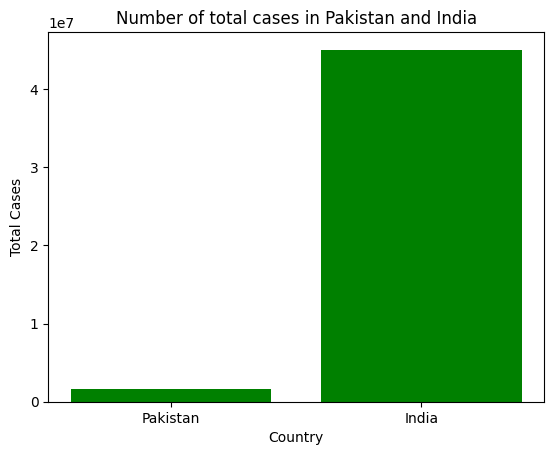

In [52]:
subset = features[features["location"].isin(["Pakistan","India"])]
subset = subset.set_index("location").loc[["Pakistan","India"]].reset_index()
plt.xlabel("Country")
plt.ylabel("Total Cases")
plt.title("Number of total cases in Pakistan and India")
subset_x = subset["location"]
subset_y = subset["total_cases"]
plt.bar(subset_x,subset_y, color="green")
plt.show()

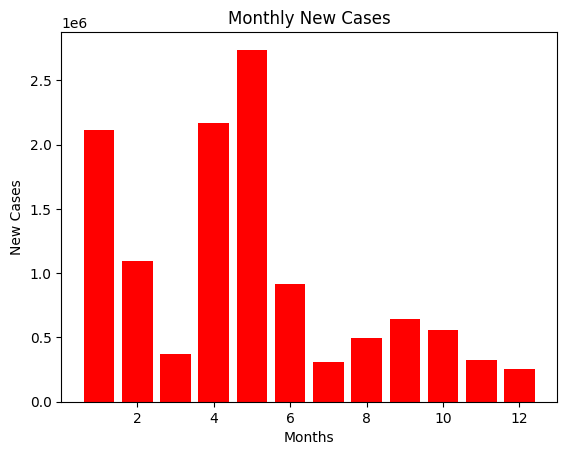

In [58]:
plt.xlabel("Months")
plt.ylabel("New Cases")
plt.title("Monthly New Cases")
x = subset["month"]
y = subset["new_cases"]
plt.bar(x,y, color="red")
plt.show()